### Visual representation of event records

Let us first import some particle physics specific packages. HepMC is the standardised output format for event generators. The package 
'pyhepmc' provides an interface in python. The 'particle' package provides a useful container representing information on a single particle.

In [1]:
import pyhepmc
from particle import Particle

We also need 'matplotlib' to create figures where we can draw the events. It works well with the 'numpy' package.

In [2]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import matplotlib.patches as patches

Let us define some useful functions, one to retreive the name of a particle, and one to strip a HepMC event of everything but the 
(interesting) final state particles.

In [3]:
def GetName(particle):
    """Retreive the name of the particle.

    Particle types from Monte Carlo generators are identified
    by a numbering scheme, for example 1,2,3,4,5,6 are the six
    quarks, 21 is a gluon and 23 is the Z boson.
    Here we use the additional 'particle' package to convert 
    these numbers into more useful strings.
    """
    return Particle.from_pdgid(particle.pid).name


def GetCharge(particle):
    return Particle.from_pdgid(particle.pid).charge


def GetFS(event):
    """Obtain all final state particles from an event.

    The event record will contain all kinds of intermediate particles.
    We are only interested in the ones that are actually produced in the
    end. We can identify them by their status code.
    """
    return [p for p in event.particles if p.status == 1]

We can always see the comments we made at the beginning with the useful 'help' function!

In [4]:
help(GetFS)

Help on function GetFS in module __main__:

GetFS(event)
    Obtain all final state particles from an event.
    
    The event record will contain all kinds of intermediate particles.
    We are only interested in the ones that are actually produced in the
    end. We can identify them by their status code.



No let us open the hepmc file and look whats inside...

In [5]:
# The 1.1* in lines 2 and 3 increases the maximum x and y momentum values by 10% so the lines both fit comfortably on the graphs
# The abs on lines 2 and 3 changes the maximum x/y value from negative to positive
# The 'for' statements in lines 2 and 3 loop through all the particles in each event to discover the maximum value
# Line 4 is the default code for creating a figure and the espect ratio is determines by the figsize
# Line 5 creates the x/y axis to fit the maximum value defined earlier in line 2&3 as well as it's negative counterpart 


# Line 1 opens the hepmc files containing all the momenta values
# Lines 2&3 print 'Looking at even i' according to the even number

In [6]:
with pyhepmc.open('../data/events.hepmc.gz') as f:
    for i,event in enumerate(f):
        print(f'Looking at event {i}:')
        fs = GetFS(event)
        for p in fs:
            print(f'\t particle = {GetName(p)}')
            print(f'\t px = {p.momentum.px} GeV py = {p.momentum.py} GeV')
            print(f'\t pt = {p.momentum.pt()} GeV')
            print(f'\t pz = {p.momentum.pz} GeV')
            print(f'\t eta = {p.momentum.eta()} GeV')
            print(f'\t phi = {p.momentum.phi()} GeV')
        

Looking at event 0:
	 particle = Z0
	 px = 298.6266212222 GeV py = 178.2607196243 GeV
	 pt = 347.7854842622973 GeV
	 pz = -171.6249006297 GeV
	 eta = -0.4753718462914376 GeV
	 phi = 0.5381628686173399 GeV
	 particle = s
	 px = -219.4500311752 GeV py = -90.78850038335 GeV
	 pt = 237.48866917108654 GeV
	 pz = 45.52963996235 GeV
	 eta = 0.19055753812391799 GeV
	 phi = -2.7493241350615043 GeV
	 particle = s~
	 px = -79.17659004698 GeV py = -87.47221924097 GeV
	 pt = 117.98441231962744 GeV
	 pz = -29.8219627243 GeV
	 eta = -0.25014501249586385 GeV
	 phi = -2.3064564373329435 GeV
Looking at event 1:
	 particle = Z0
	 px = -80.03400550187 GeV py = 21.75697004483 GeV
	 pt = 82.93857837101494 GeV
	 pz = 43.50746507207 GeV
	 eta = 0.5030832331490722 GeV
	 phi = 2.876160516628745 GeV
	 particle = g
	 px = 82.20642396784 GeV py = 50.34195781639 GeV
	 pt = 96.39610395844558 GeV
	 pz = -118.0669737415 GeV
	 eta = -1.0317601292266179 GeV
	 phi = 0.5494761777984047 GeV
	 particle = d~
	 px = -2.172418

In [7]:
def get_figure(particles):
    pxs=1.5*max([abs(p.momentum.px) for p in particles]) 
    pys=1.5*max([abs(p.momentum.py) for p in particles])
    radius_x_max=max([abs(p.momentum.px) for p in particles]) #takes maximum x value of each event
    radius_y_max=max([abs(p.momentum.py) for p in particles]) #takes maximum y value of each event
    
    pxymax=max(pxs,pys)
    fig, ax = plt.subplots(figsize=(6,6))
    ax.axis('equal')
    ax.axis([-pxymax, pxymax, -pxymax, pxymax])
    ax.axhline(y=0, xmin=-pxs, xmax=pxs, color='black',alpha=0.1, linewidth=0.5)
    ax.axvline(x=0, ymin=-pys, ymax=pys, color='black', alpha=0.1, linewidth=0.5)
    ax.set_xlabel('$p_{x}$ (GeV)')
    ax.set_ylabel('$p_{y}$ (GeV)')
    return fig,ax    


def line_args(particle):
    args={}
    if abs(particle.pid) in [21,23,24,25]: 
        args["linestyle"]=':' # all bosons represented with dotted lines
        if particle.pid == 21: 
            args["color"]='blue' # g
        if particle.pid == 23: 
            args["color"]='red' # Z  
        if abs(particle.pid) == 24: 
            args["color"]='green' # W  
        if particle.pid == 25: args["color"]='orange' # H 
    elif abs(particle.pid) in [11,13,15]: 
        args["linestyle"]='--' # all leptons (excluding the neutrinos) are represented with dashed lines
        if abs(particle.pid) == 11: args["color"]='red' # electron 
        if abs(particle.pid) == 13: args["color"]='blue' # muon 
        if abs(particle.pid) == 15: args["color"]='green' # tau 
    elif abs(particle.pid) in [12,14,16]:
        args["linestyle"]='None' # all neutrino leptons are not represented because they are invisible
    elif abs(particle.pid) in [1,2,3,4,5]: 
        args["linestyle"]='solid' # all quarks represented with solid lines
        if abs(particle.pid) == 1:
            args["color"]='red' # d
        if abs(particle.pid) == 2:
            args["color"]='green' # u
        if abs(particle.pid) == 3:
            args["color"]='orange' # s
        if abs(particle.pid) == 4:
            args["color"]='blue' # c
        if abs(particle.pid) == 5:
            args["color"]='purple' # b   
        if abs(particle.pid) == 6:
            args["color"] = 'brown' # t
    else:
        args["color"] = 'black' # if the particle is not any of the particles mentioned above, it will be represented with black line
        args["linestyle"] = ':'

    if GetCharge(particle) > 0:
        args["marker"] = '^'
    elif GetCharge(particle) < 0:
            args["marker"] = 'v'
    elif GetCharge(particle) == 0:
            args["marker"] = 'o'
    return args
          

def line_label(particle): # this function labels all the types of particles so they can be shown in a table later
    argss={}
    if abs(particle.pid) == 21: 
        argss["label"]='g'
    elif abs(particle.pid) == 23:
        argss["label"]='Z'
    elif abs(particle.pid) == 24:
        argss["label"]='W+-'
    elif abs(particle.pid) == 25:
        argss["label"]='H'
    elif abs(particle.pid) == 1: 
        argss["label"]='d'
    elif abs(particle.pid) == 2: 
        argss["label"]='u'
    elif abs(particle.pid) == 3:
        argss["label"]='s'
    elif abs(particle.pid) == 4:
        argss["label"]='c'
    elif abs(particle.pid) == 5: 
        argss["label"]='b'
    elif abs(particle.pid) == 6:
        argss["label"]='t'
    elif abs(particle.pid) == 11:
        argss["label"]='e'
    elif abs(particle.pid) == 12:
        argss["label"]='ve'
    elif abs(particle.pid) == 13:
        argss["label"]='μ'
    elif abs(particle.pid) == 14:
        argss["label"]='vμ'
    elif abs(particle.pid) == 15:
        argss["label"]='τ'
    elif abs(particle.pid) == 16:
        argss["label"]='vτ'
    else:
        argss['label']=GetName(particle)
    return argss

def draw_transverse(ax, particles, showlegend=True):
    for p in particles:
        ax.plot([0,p.momentum.px], [0,p.momentum.py], **line_args(p), **line_label(p), markersize=5) #marker='s', markersize=2#
       # ax.plot([0], [0], marker= 'o', color = 'white', markersize=6)
        circle_max = patches.Circle((0, 0), radius=p.momentum.pt(), fill = False, alpha=0.5)
        ax.add_patch(circle_max)
        if showlegend: ax.legend() # prints the key of labels from earlier into each graph

        plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0)
        if showlegend: ax.legend()# prints the key of labels from earlier into each graph
            


Looking at event 0:


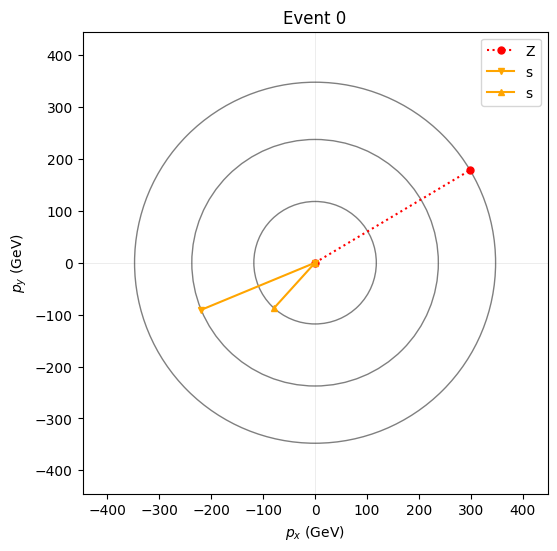

Looking at event 1:


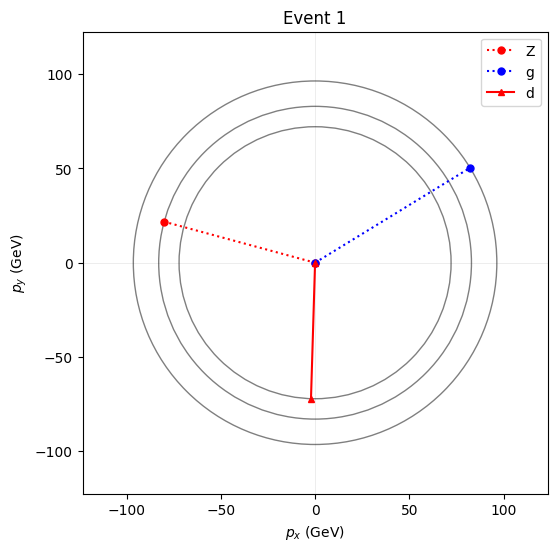

Looking at event 2:


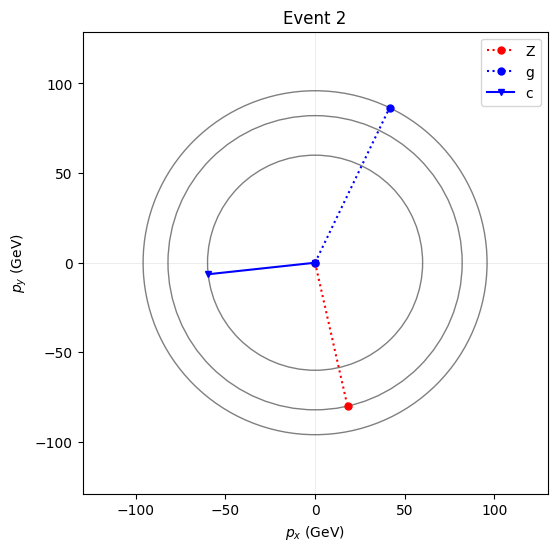

Looking at event 3:


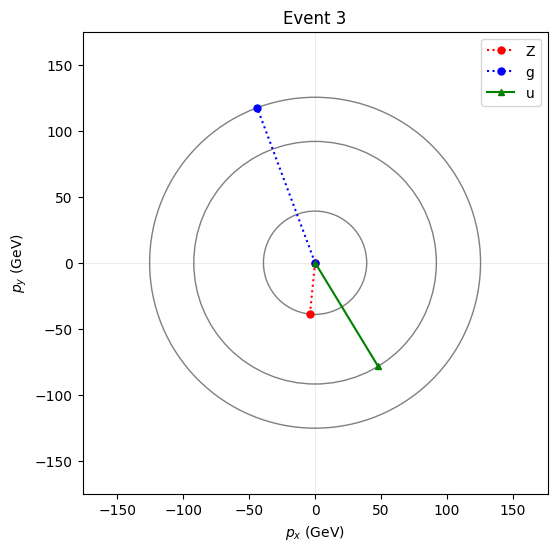

Looking at event 4:


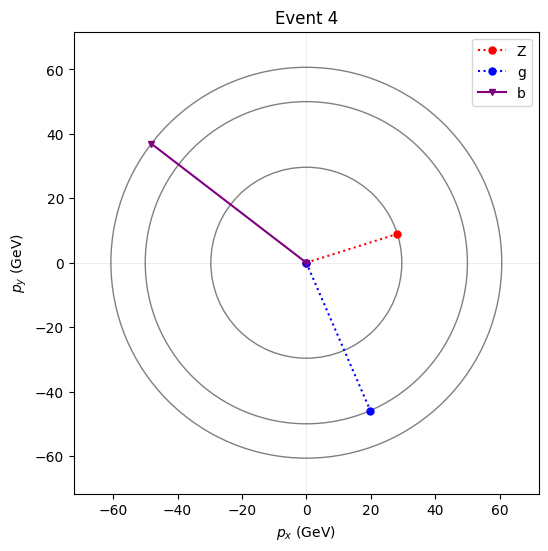

Looking at event 5:


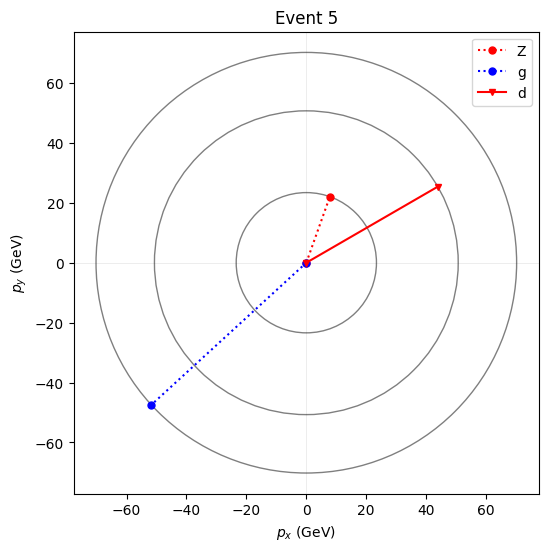

Looking at event 6:


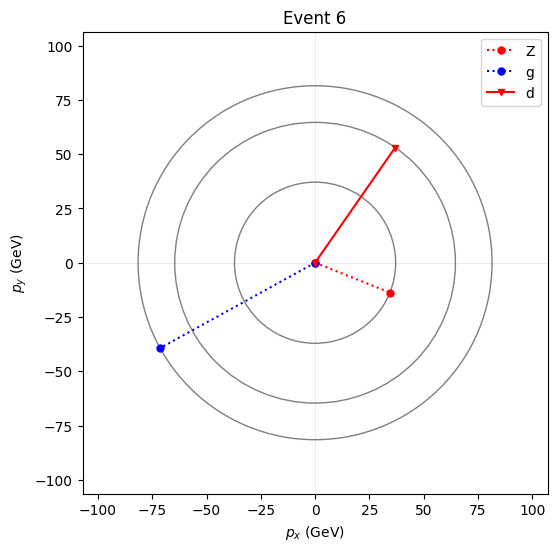

Looking at event 7:


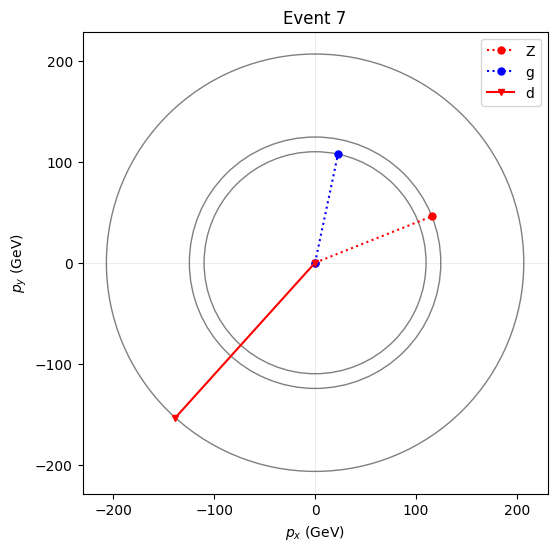

Looking at event 8:


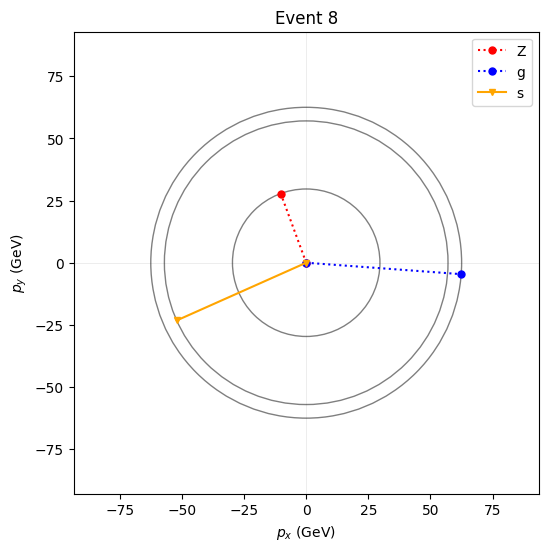

Looking at event 9:


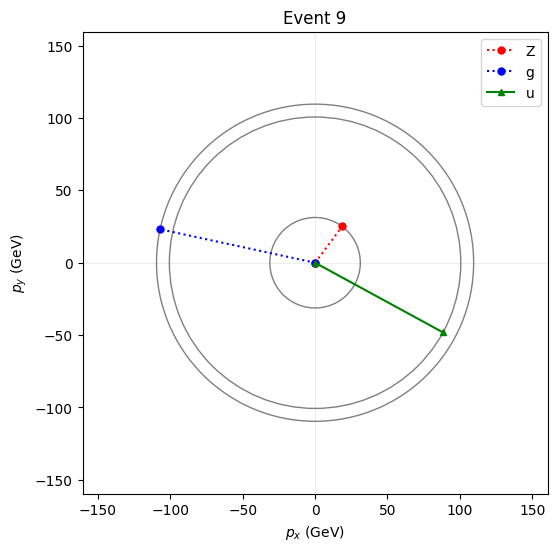

In [8]:
with pyhepmc.open('../data/events.hepmc.gz') as f:
    for i,event in enumerate(f):
        print(f'Looking at event {i}:')
        fs = GetFS(event)
        fig,ax=get_figure(fs)
        draw_transverse(ax, fs)
        ax.set_title(f'Event {i}')
        plt.show()
        

In [9]:
with pyhepmc.open('../data/events_decayed.hepmc.gz') as f:
    for i,event in enumerate(f):
        print(f'Looking at event {i}:')
        fs = GetFS(event)
        for p in fs:
            print(f'\t{GetName(p)}')
            print(p.momentum.pt())

Looking at event 0:
	(ud)(0)
1.2644334610379726
	s
0.20029811092939576
	u
0.24040329455148218
	(ud)(0)
1.5114243104764422
	u
0.3985751121055802
	mu-
26.00384713080486
	g
95.017531370829
	s~
88.45341863394414
	mu+
75.11769381265412
Looking at event 1:
	(uu)(1)
2.5049962458148842
	d
2.20372410608596
	d
0.8499099313650733
	(uu)(1)
1.5153731116873395
	d
0.6076550162142028
	u
46.12627190759178
	g
174.89367069911754
	d~
201.75391838547978
	u~
74.55688147103326
Looking at event 2:
	(ud)(0)
0.9994446394475467
	s
0.35097063278158885
	u
0.8520666085595199
	(ud)(0)
1.8226129813450986
	u
1.5747749375040558
	nu(e)
35.90927467062564
	g
65.79804443745167
	s~
77.6335374630601
	nu(e)~
47.95092658227885
Looking at event 3:
	(uu)(1)
1.806136956934814
	d
0.21473271262977542
	d
1.5091808405730833
	(ud)(0)
1.6058484751515167
	W-
41.75912973359925
	u
165.07549217108448
	d~
98.2968938945183
	nu(tau)
30.209383223024442
	tau+
10.847923862576854
Looking at event 4:
	(uu)(1)
1.130467924222829
	(ud)(0)
0.646682287

Looking at event 0:


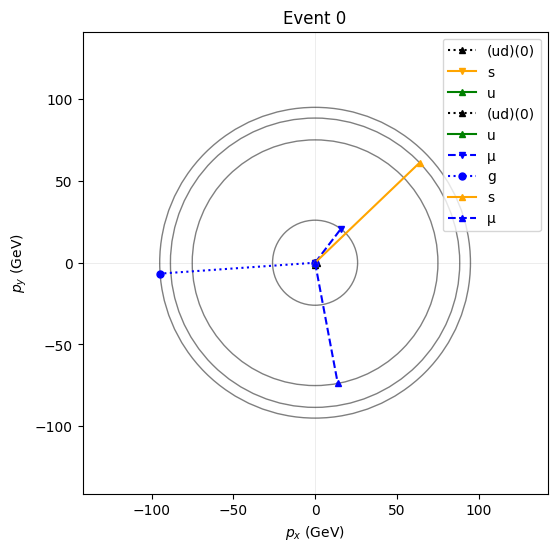

Looking at event 1:


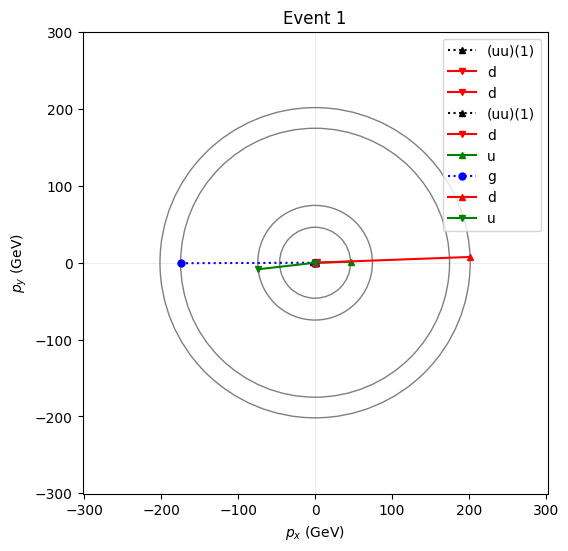

Looking at event 2:


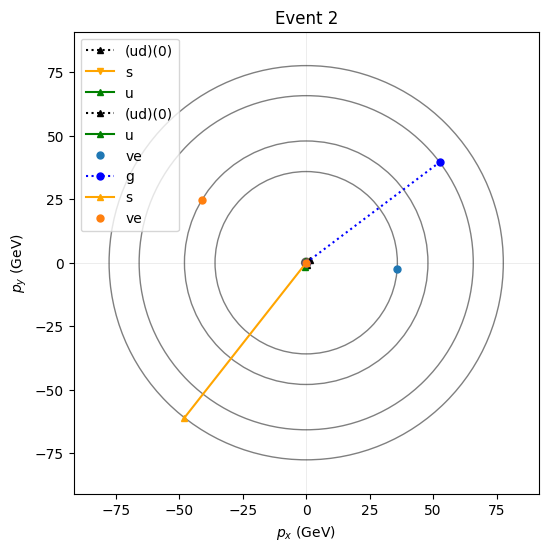

Looking at event 3:


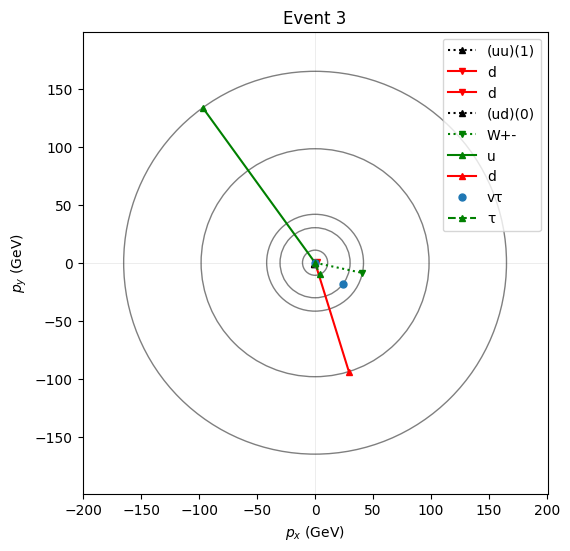

Looking at event 4:


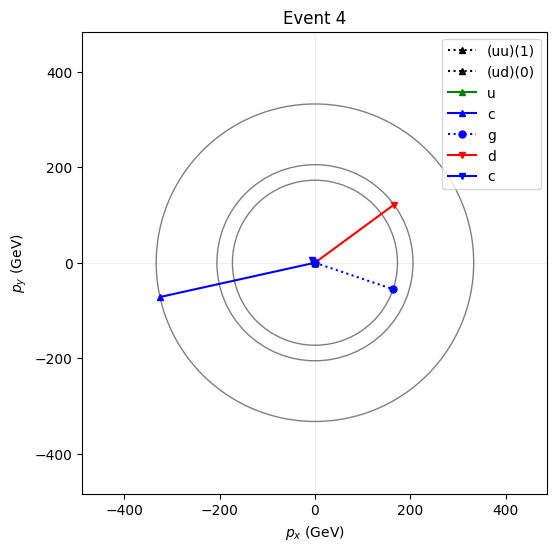

Looking at event 5:


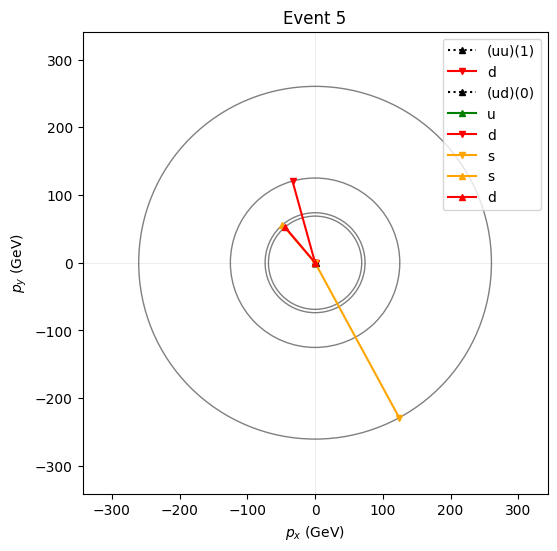

Looking at event 6:


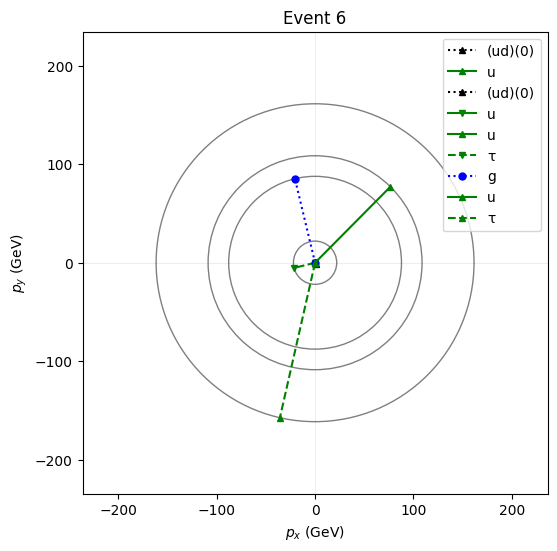

Looking at event 7:


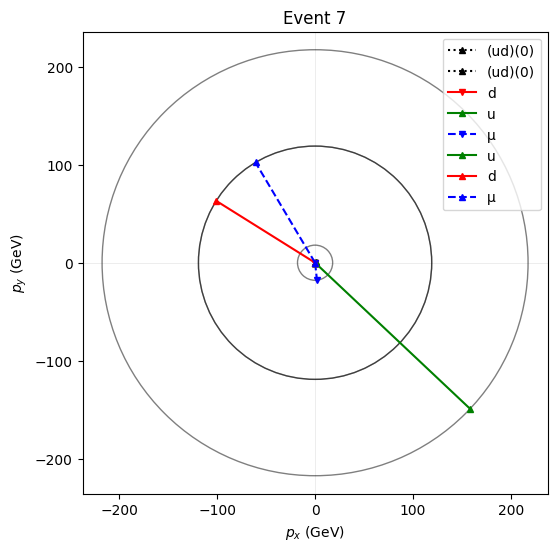

Looking at event 8:


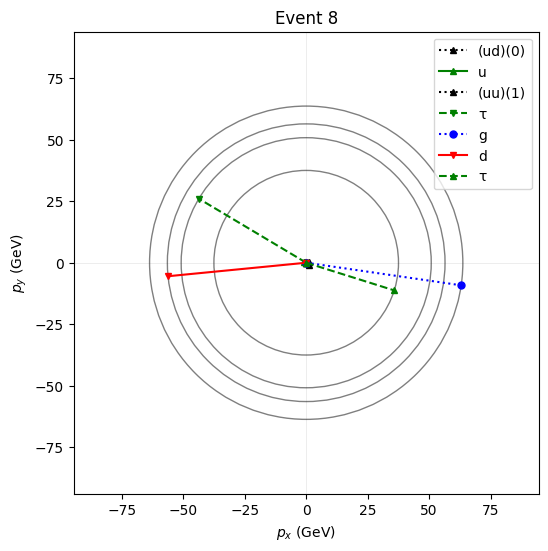

Looking at event 9:


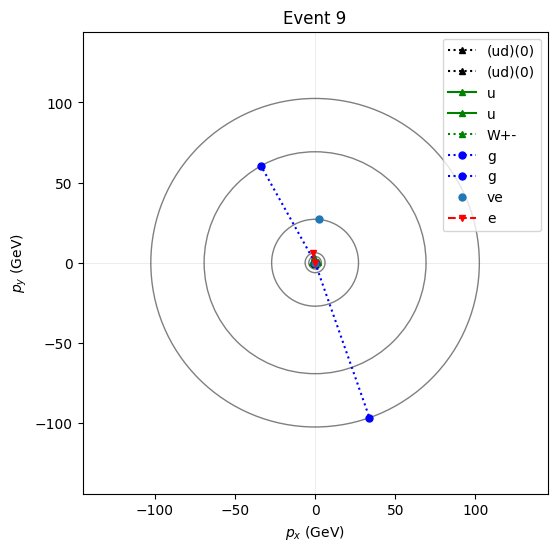

In [10]:
with pyhepmc.open('../data/events_decayed.hepmc.gz') as f:
    for i,event in enumerate(f):
        print(f'Looking at event {i}:')
        fs = GetFS(event)
        fig,ax=get_figure(fs)
        draw_transverse(ax, fs)
        ax.set_title(f'Event {i}')
        plt.show()

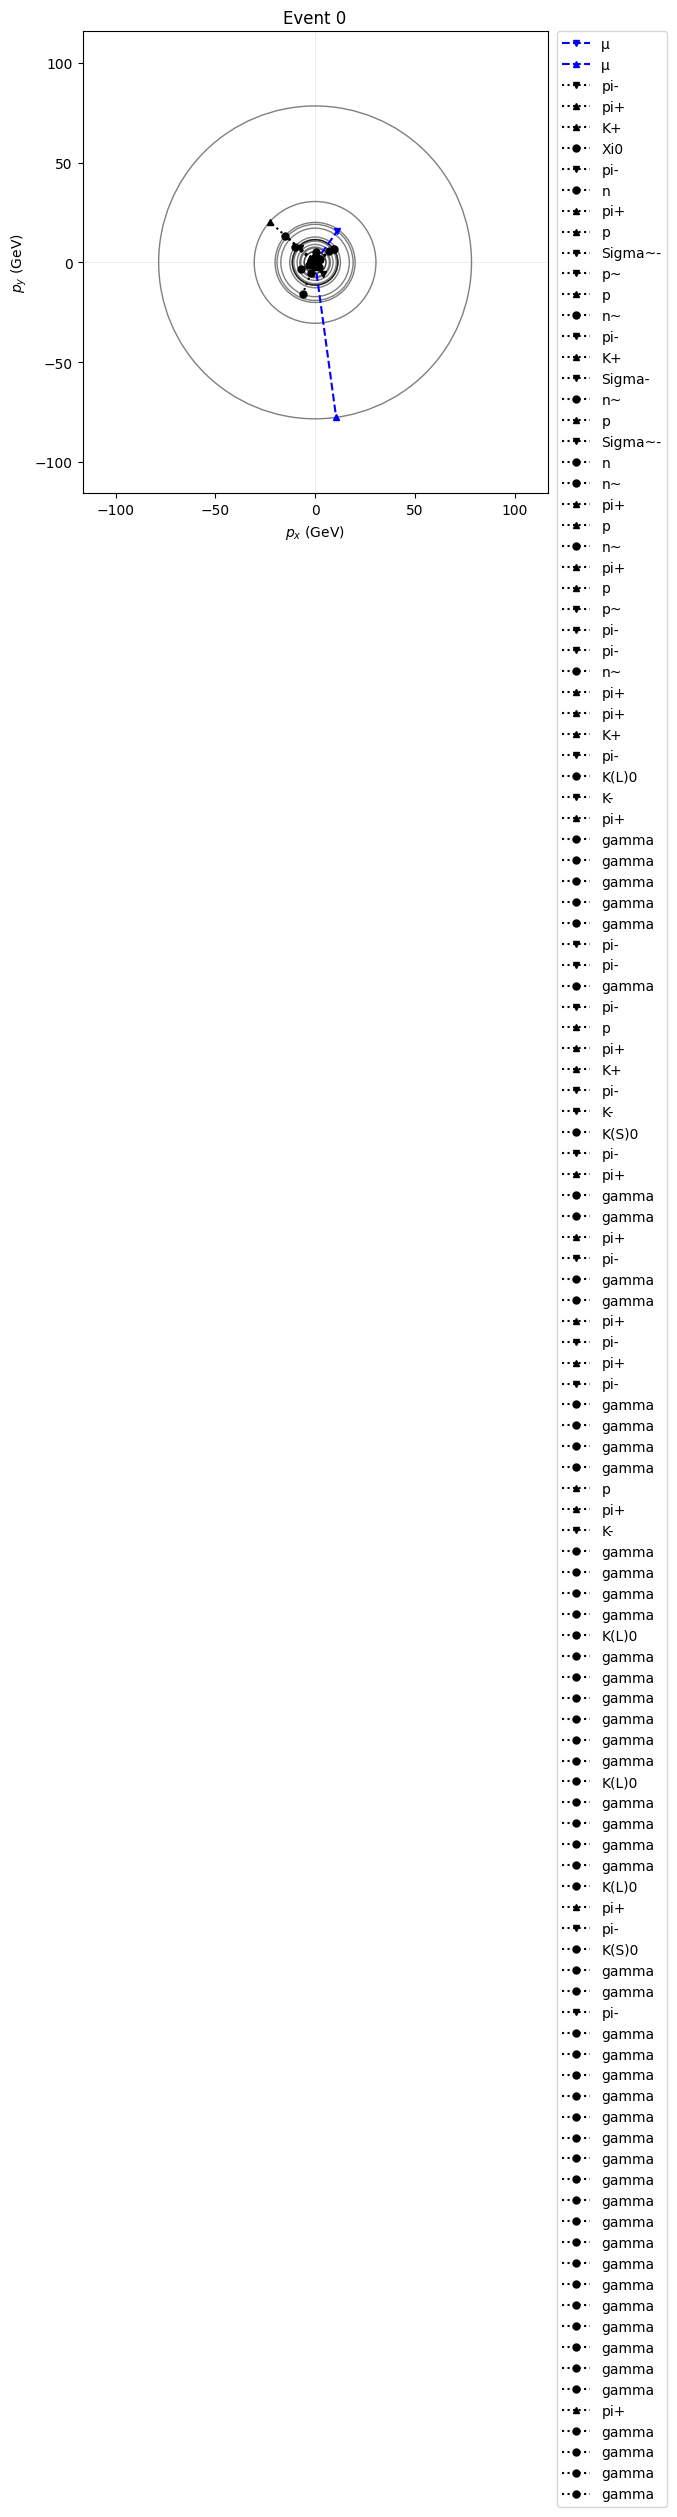

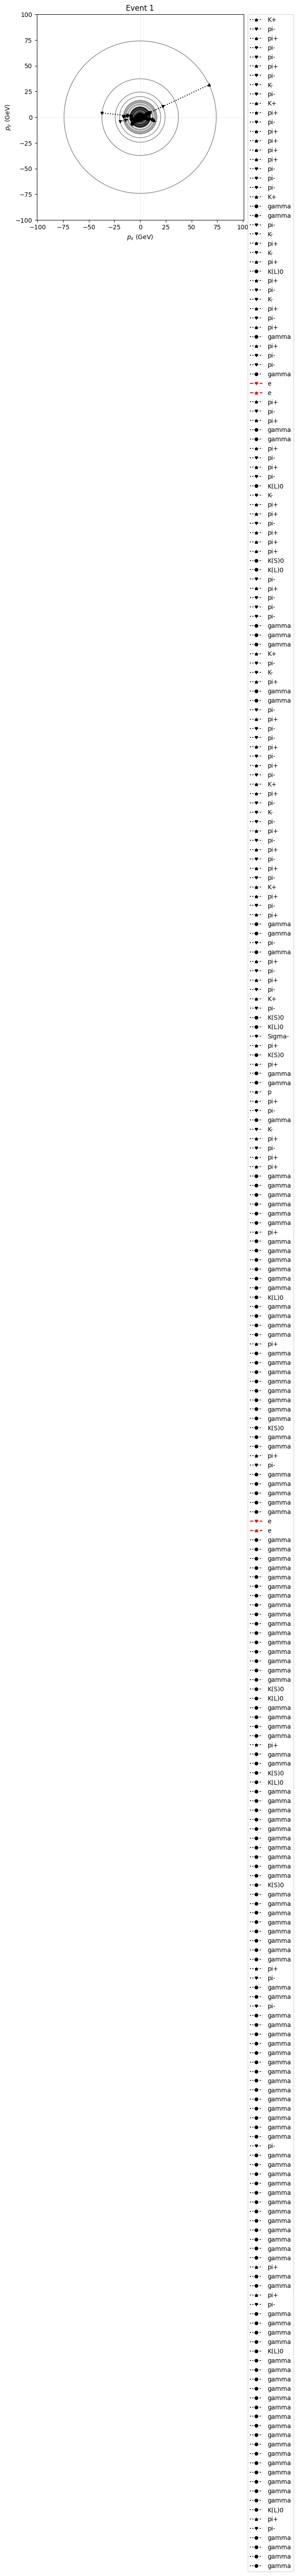

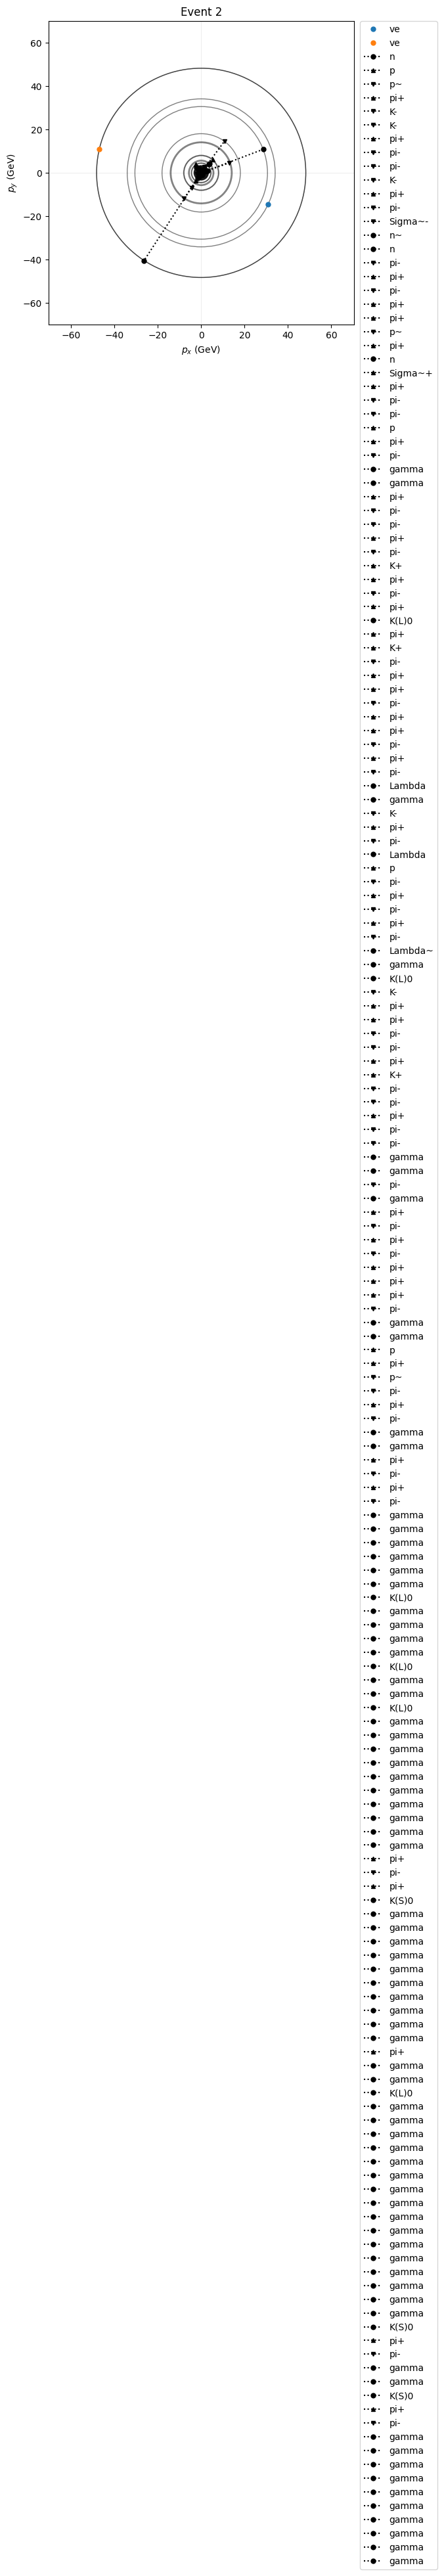

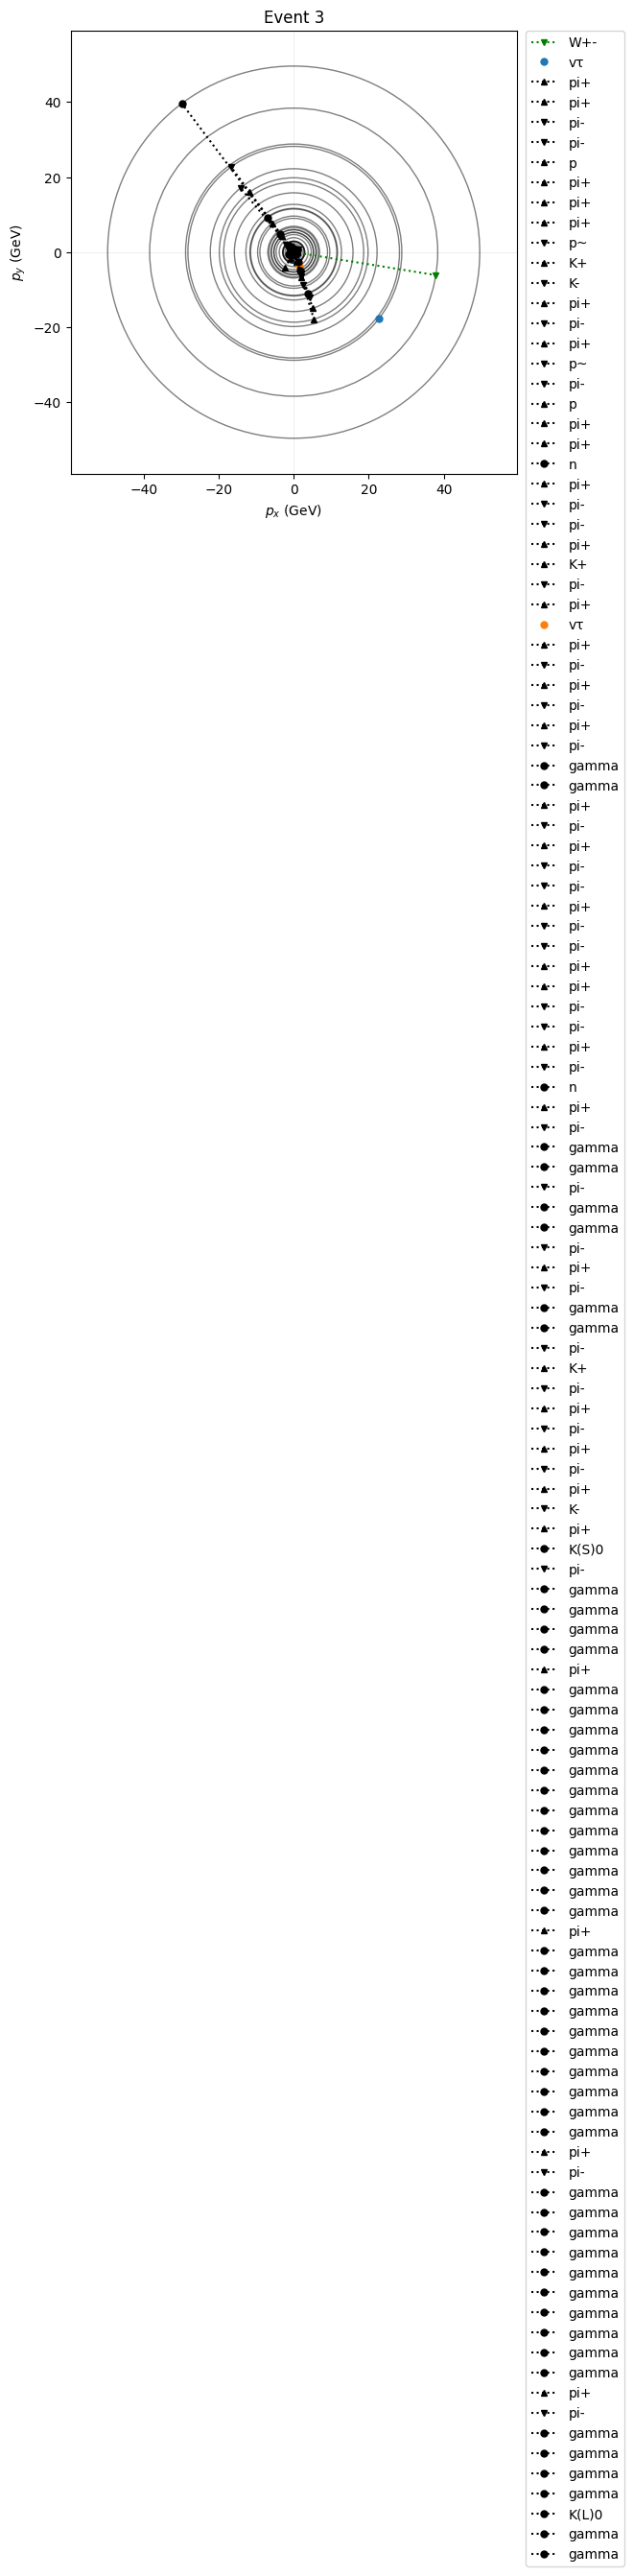

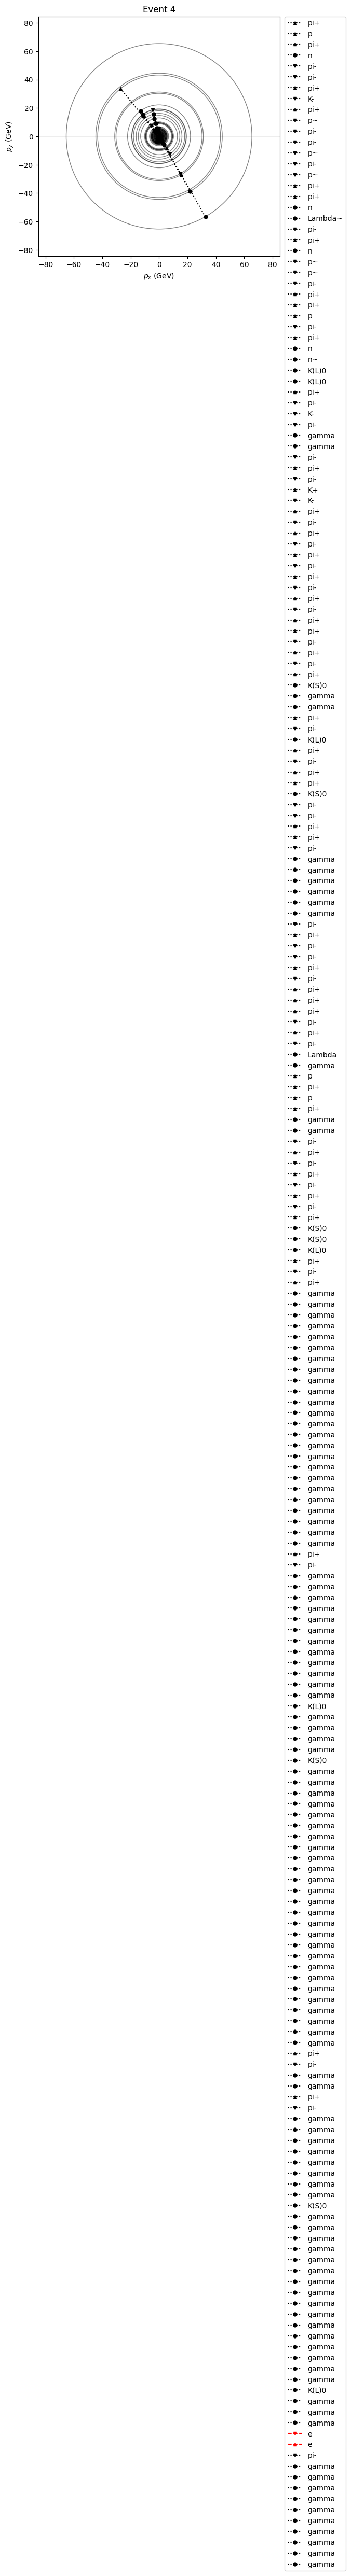

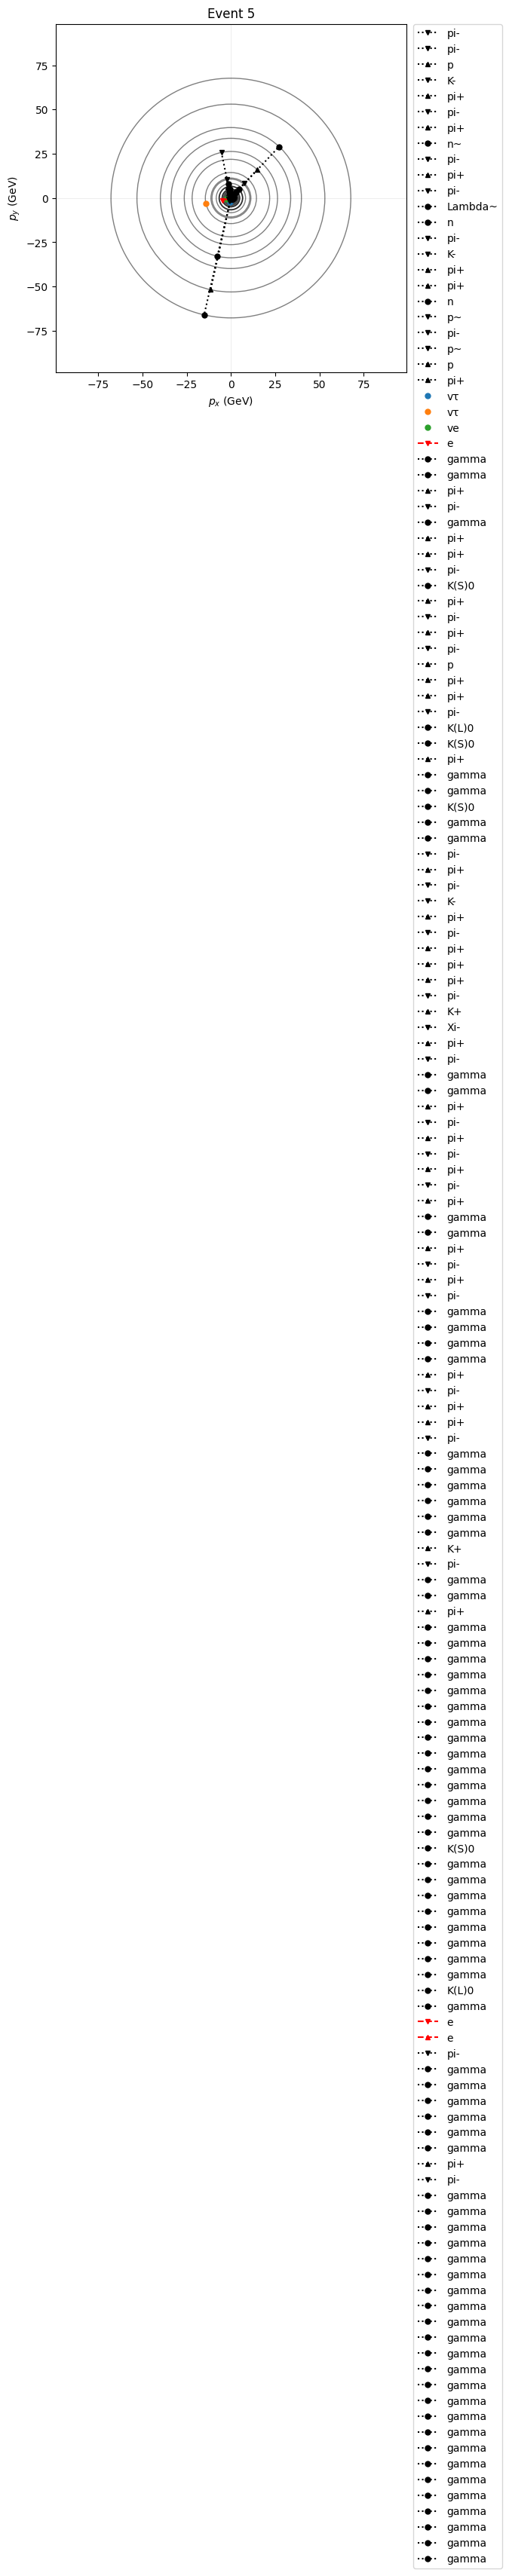

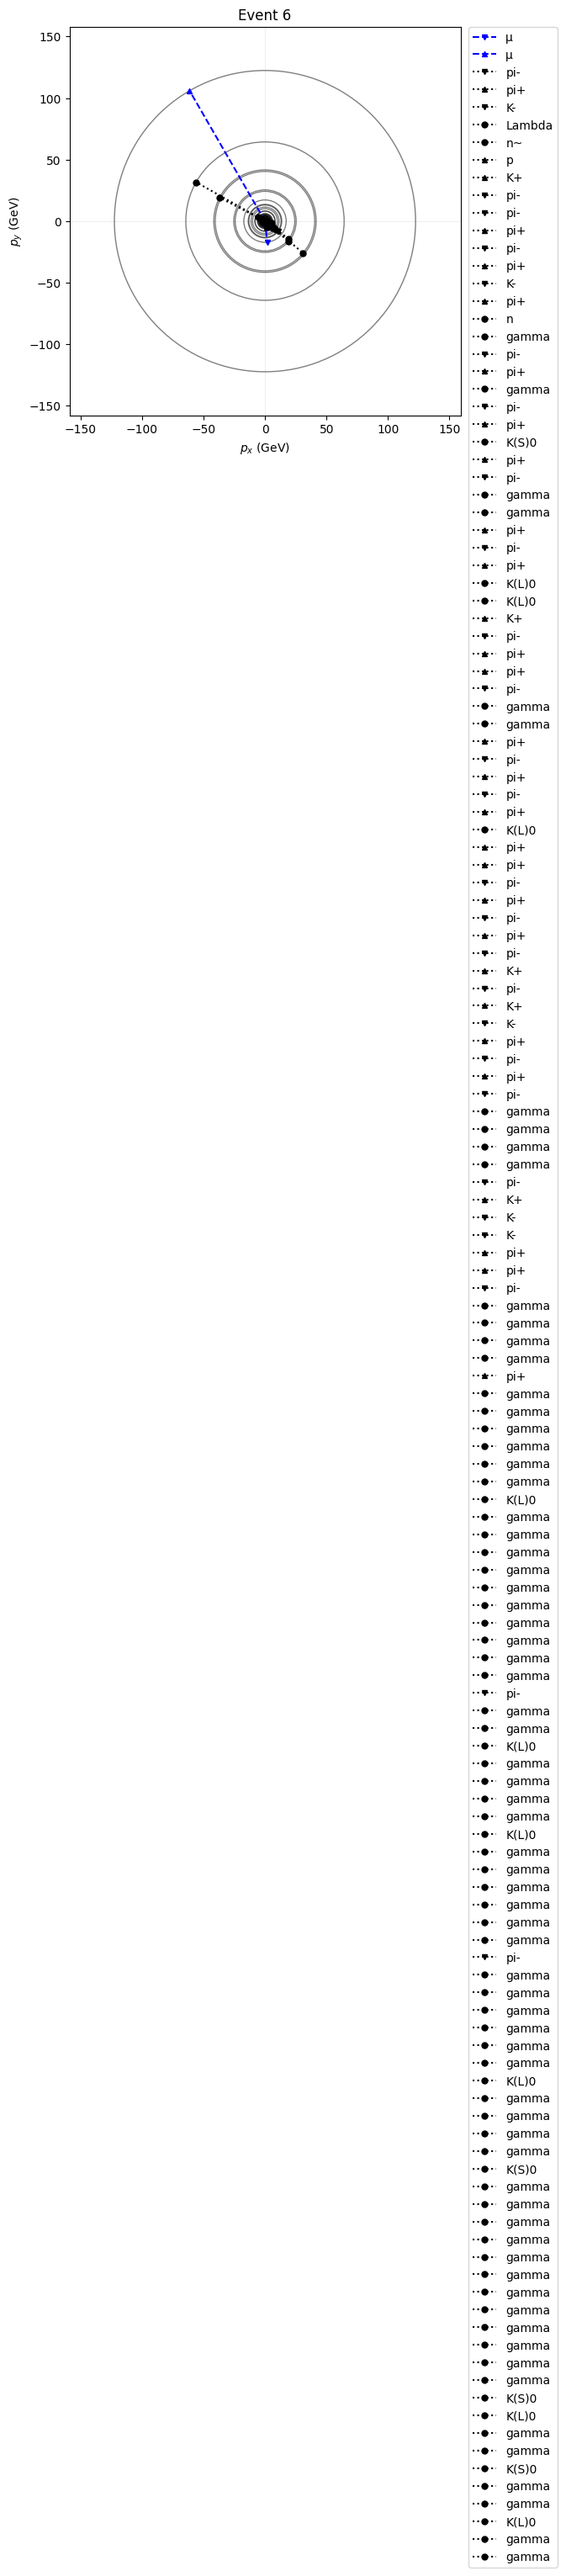

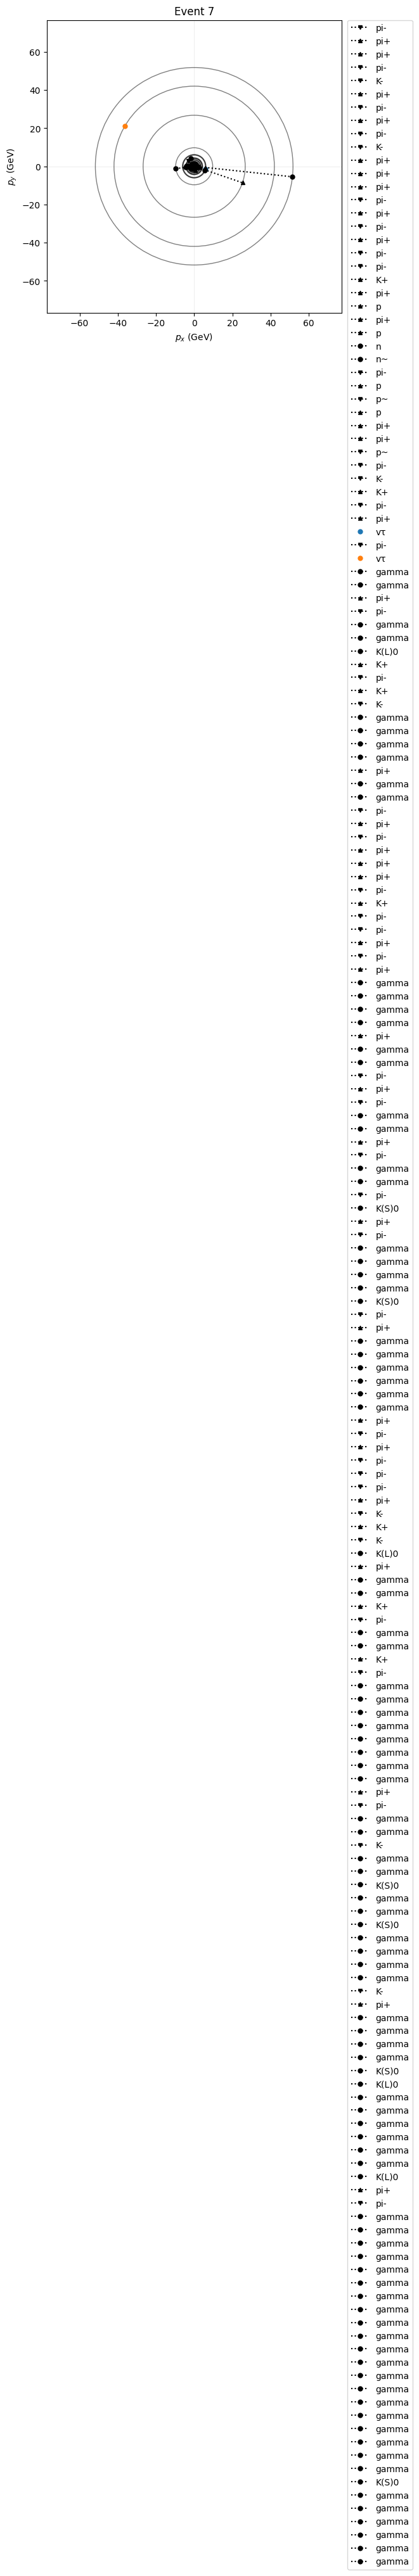

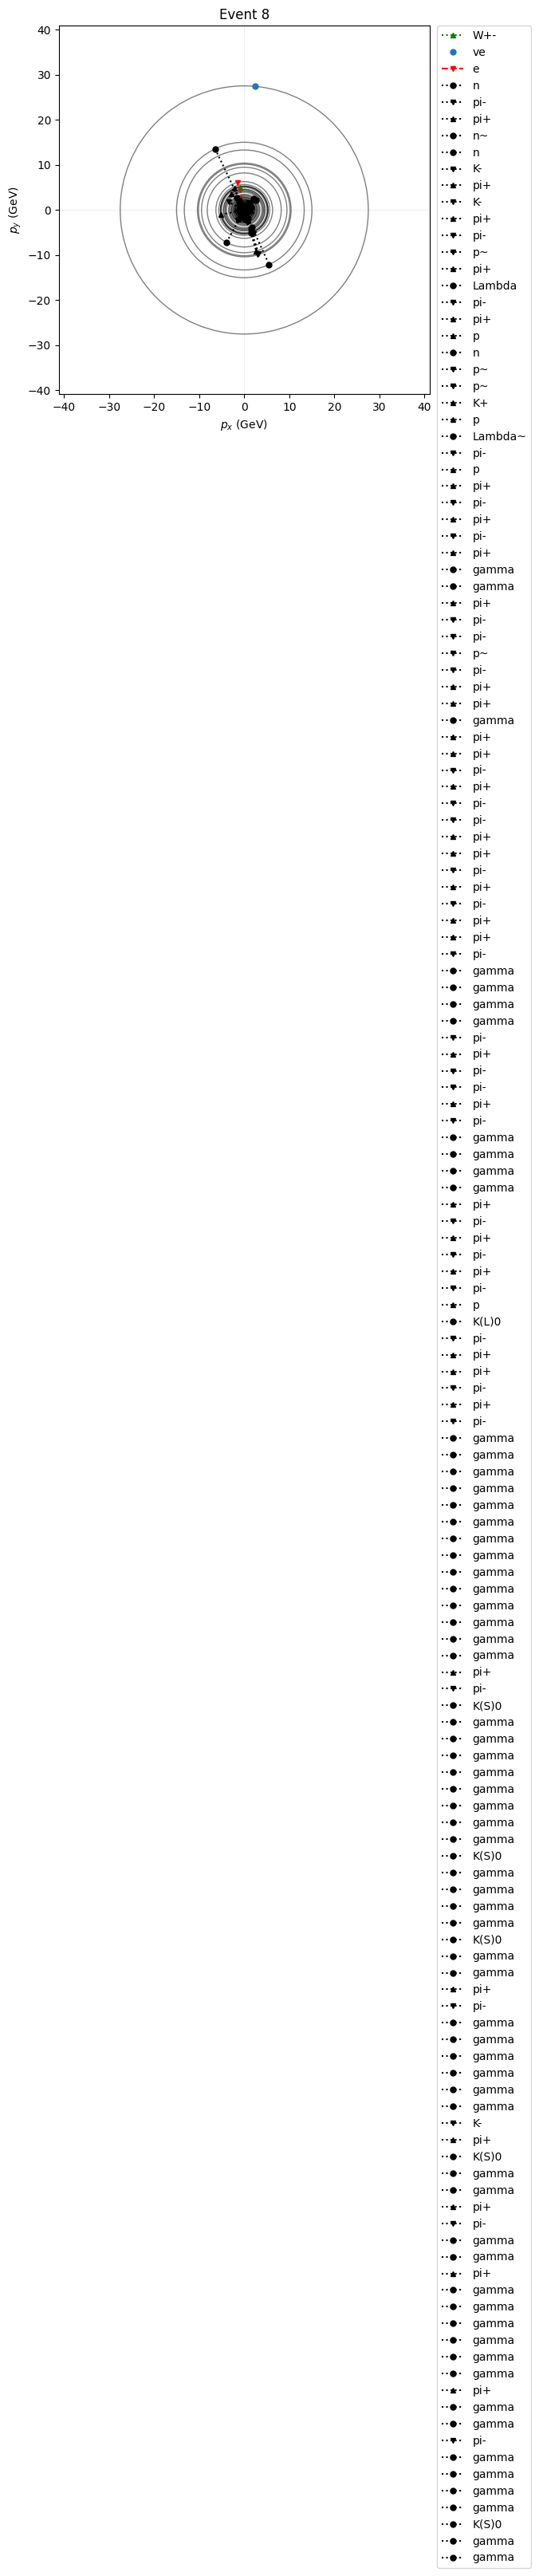

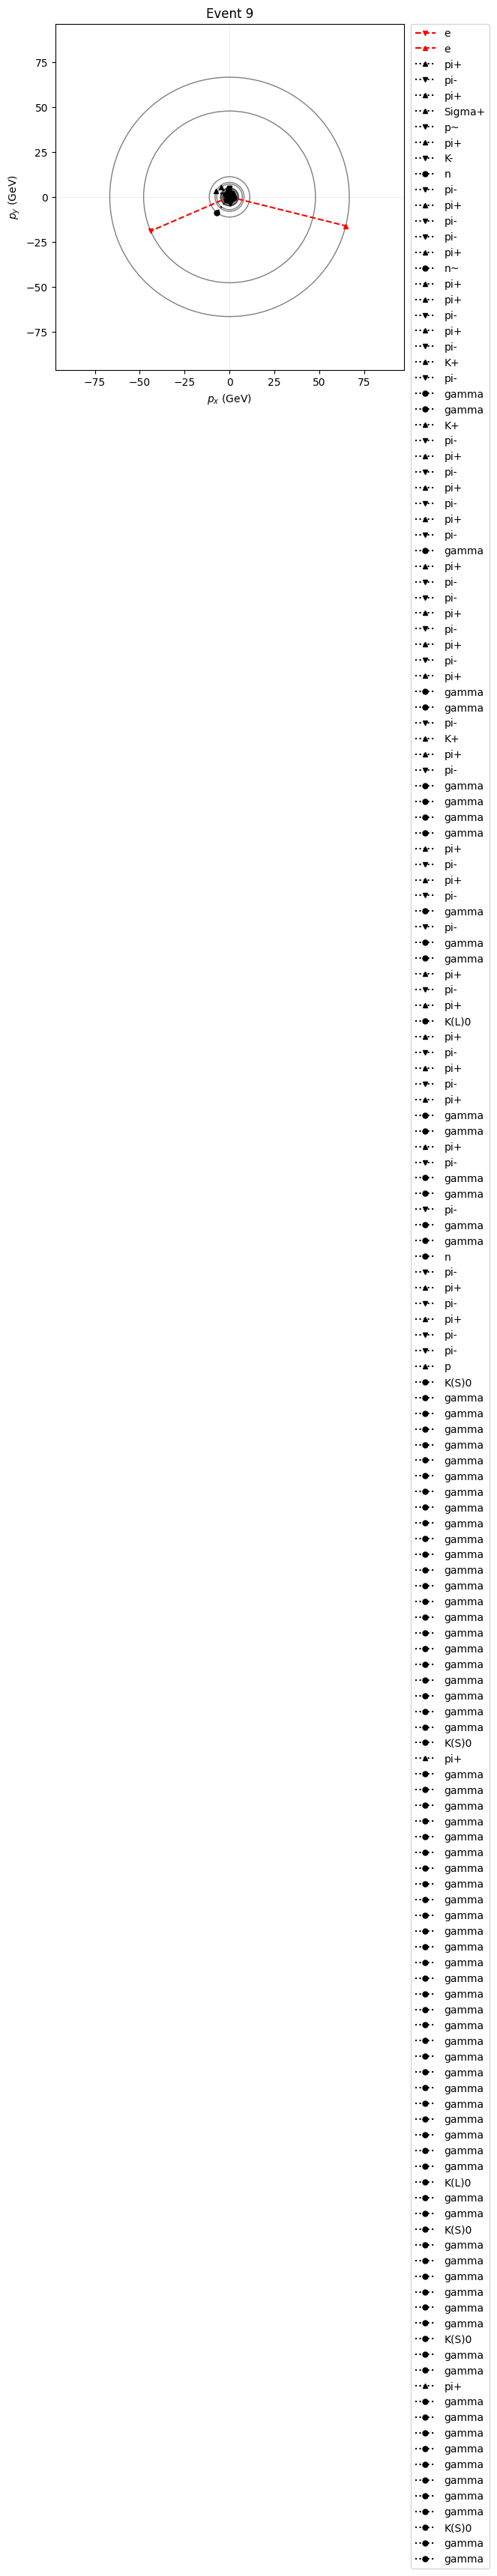

In [11]:
with pyhepmc.open('../data/events_decayed_hadronised.hepmc') as f:
    for i,event in enumerate(f):
        fs = GetFS(event)
        fig,ax=get_figure(fs)
        draw_transverse(ax, fs, showlegend=False)
        ax.set_title(f'Event {i}')
        plt.show()

In [12]:
help(Particle.from_pdgid(fs[0].pid))


Help on Particle in module particle.particle.particle object:

class Particle(builtins.object)
 |  Particle(pdgid, pdg_name: 'str', mass: 'float' = -1.0, mass_upper: 'float' = -1.0, mass_lower: 'float' = -1.0, width: 'float' = -1.0, width_upper: 'float' = -1.0, width_lower: 'float' = -1.0, three_charge=<Charge.u: 50>, I: 'str' = None, G=<Parity.u: 5>, P=<Parity.u: 5>, C=<Parity.u: 5>, anti_flag=<Inv.Same: 0>, rank: 'int' = 0, status=<Status.NotInPDT: 4>, quarks='', latex_name: 'str' = 'Unknown') -> None
 |  
 |  The Particle object class. Hold a series of properties for a particle.
 |  
 |  Class properties:
 |  
 |  C
 |      The charge conjugation parity quantum number, if relevant.
 |      It is C = (-1)^(L+S) for self-conjugate mesons.
 |      Mesons with PDG IDs of the kind 9XXXXXX (N=9) are not experimentally well-known particles
 |      and None is returned.
 |  
 |  G
 |      The G-parity quantum number, if relevant.
 |  
 |  I
 |      The isospin quantum number, if relevant.
 

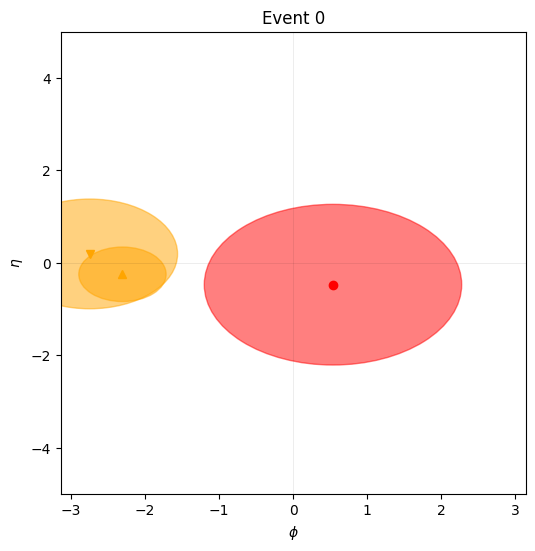

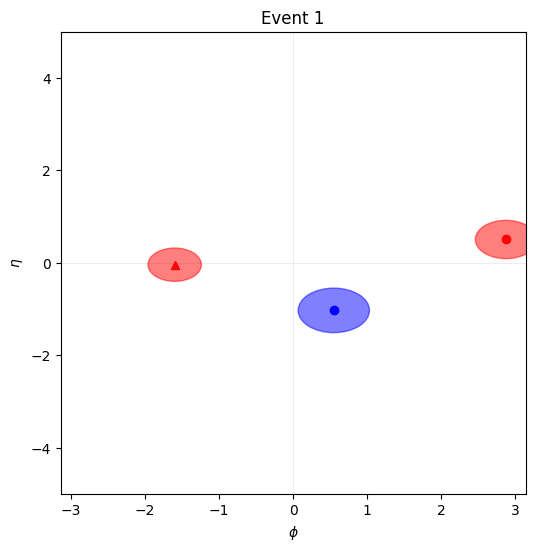

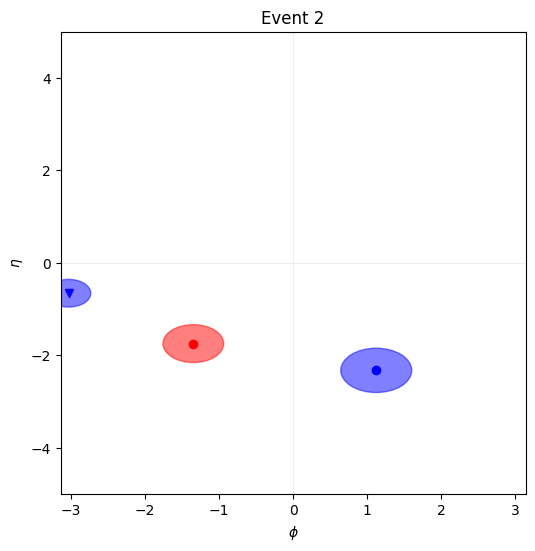

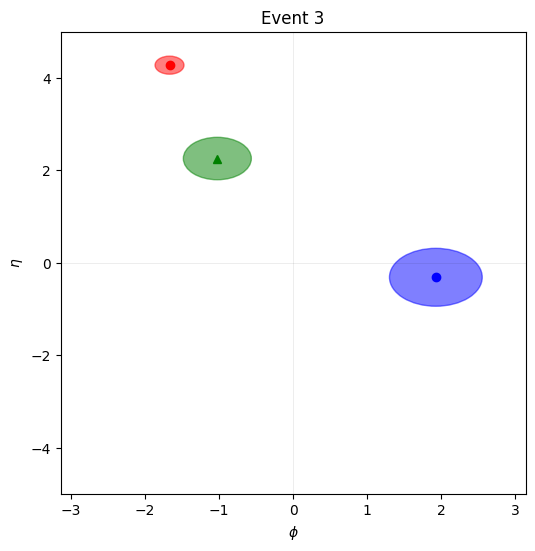

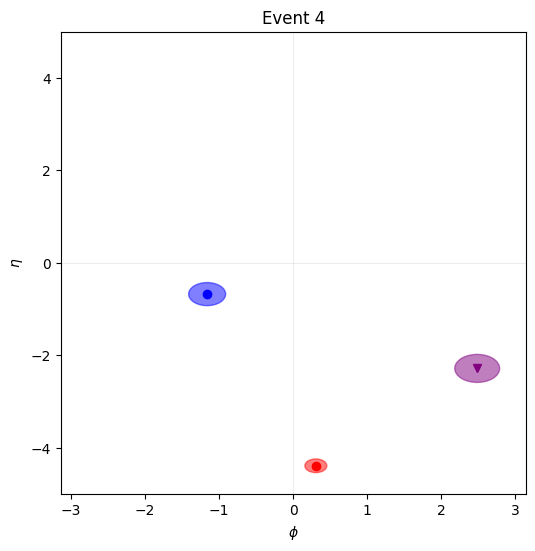

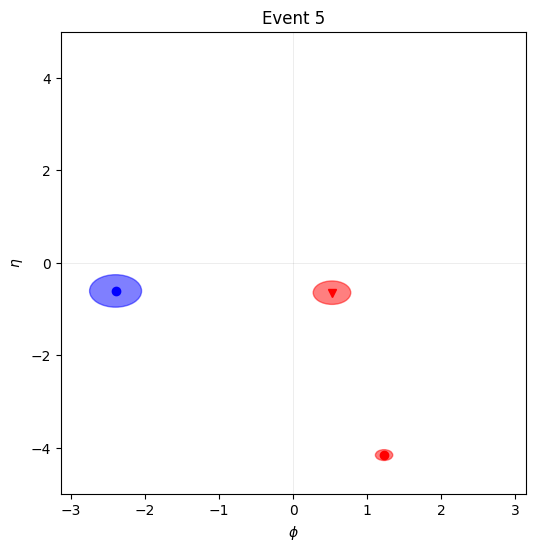

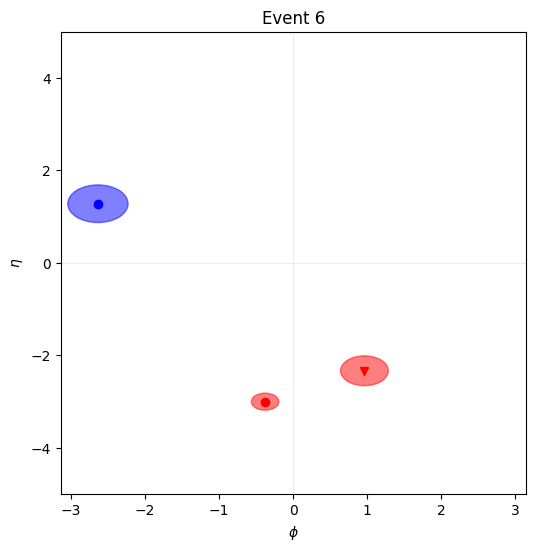

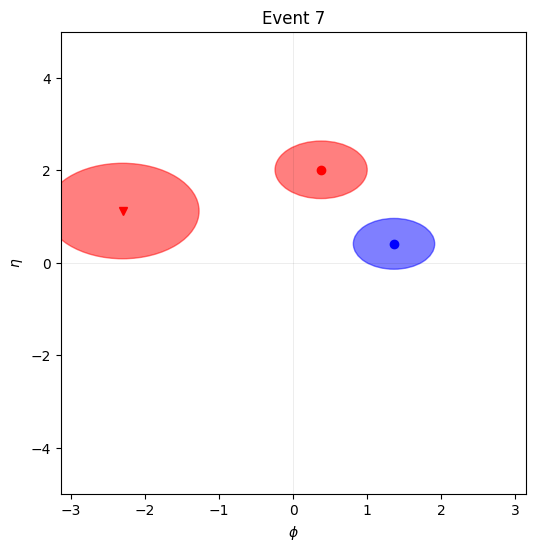

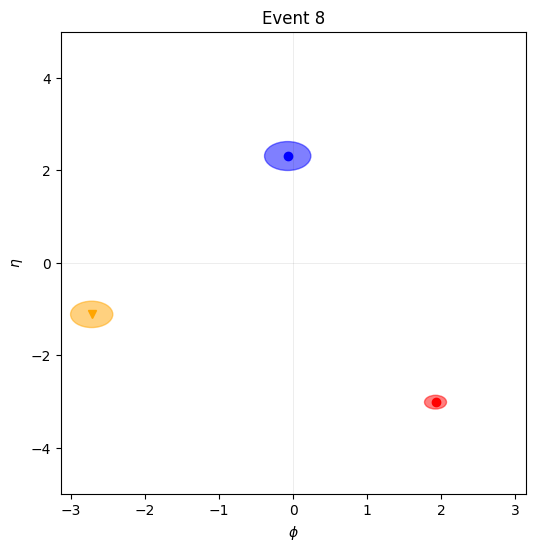

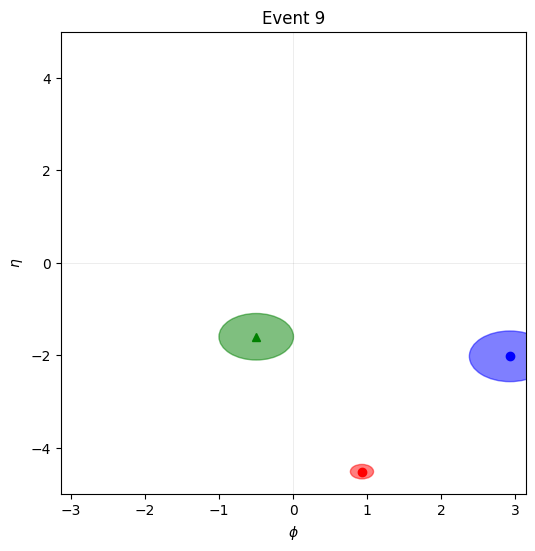

In [16]:
def get_figure_etaphi(particles):
    phix=1.1*max([abs(p.momentum.phi()) for p in particles])
    etay=1.1*max([abs(p.momentum.eta()) for p in particles])
    fig,ax = plt.subplots(figsize=(6,6))
    ax.axis([-m.pi, m.pi, -5, 5])
    ax.axhline(y=0, xmin=-m.pi, xmax=m.pi, color='black', alpha=0.1, linewidth=0.5)
    ax.axvline(x=0, ymin=-5, ymax=5, color='black', alpha=0.1, linewidth=0.5)
    ax.set_xlabel('$\phi$')
    ax.set_ylabel('$\eta$')
    return fig,ax

def draw_etaphi(ax, particles, showlegend=True):
    for p in particles:
        lineargs=line_args(p)
        ax.plot([p.momentum.phi()], [p.momentum.eta()], **lineargs, **line_label(p))
        #ax.plot([0], [0], marker= 'o', color = 'black', markersize=3)
        circle_max = patches.Circle((p.momentum.phi(), p.momentum.eta()), radius=0.005*p.momentum.pt(), fill = True, alpha=0.5, 
                                    color=lineargs.get("color", "pink"))
        ax.add_patch(circle_max)
        if showlegend: ax.legend() # prints the key of labels from earlier into each graph

with pyhepmc.open('../data/events.hepmc.gz') as f:
    for i,event in enumerate(f):
        fs = GetFS(event)
        fig,ax=get_figure_etaphi(fs)
        draw_etaphi(ax, fs, showlegend=False)
        ax.set_title(f'Event {i}')
        plt.show()
        

In [14]:

#def custom_label

#with pyhepmc.open('../data/events_decayed_hadronised.hepmc') as f:
  #  for i,event in enumerate(f):
   #     print(f'Looking at event {i}:')
 #       fs = GetFS(event)
  #      fig,ax=get_figure_etaphi(fs)
  #      draw_etaphi(ax, fs, showlegend=False)
  #      plt.show()
        

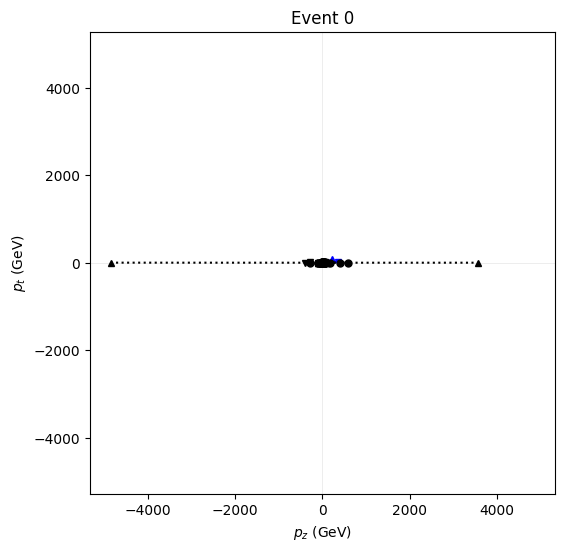

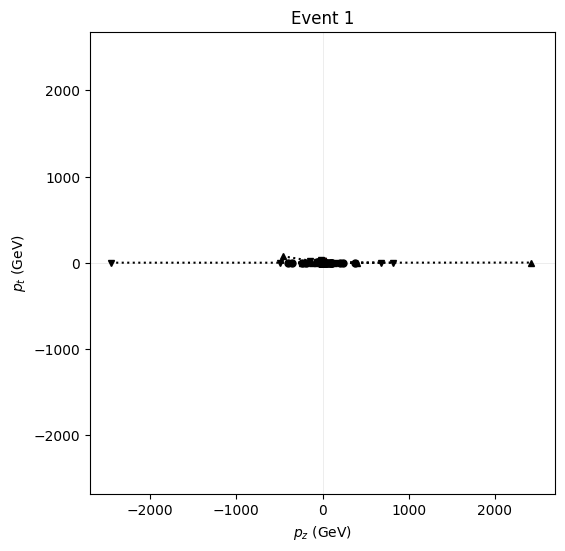

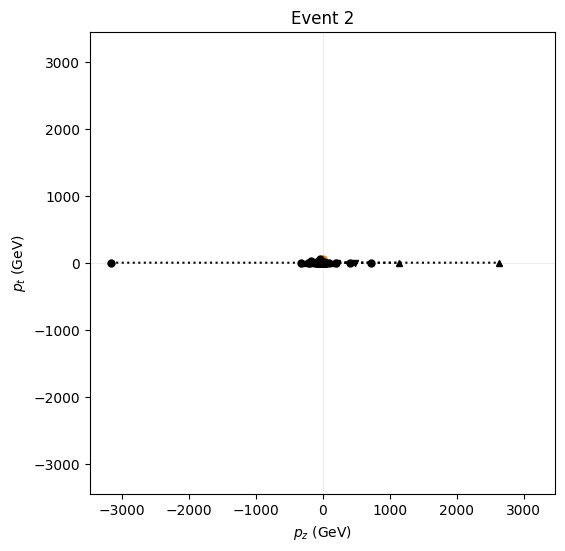

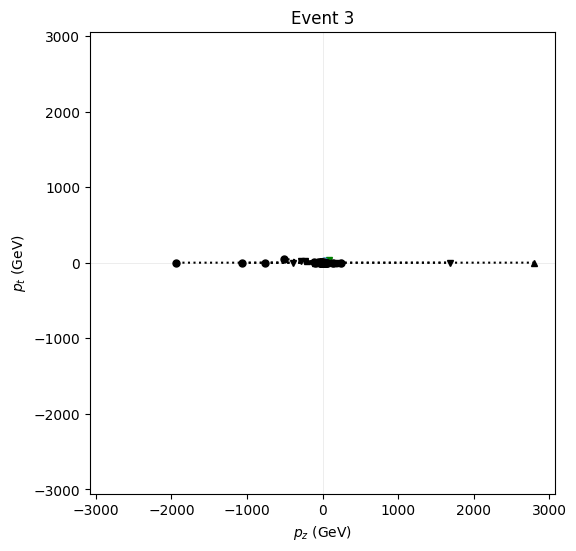

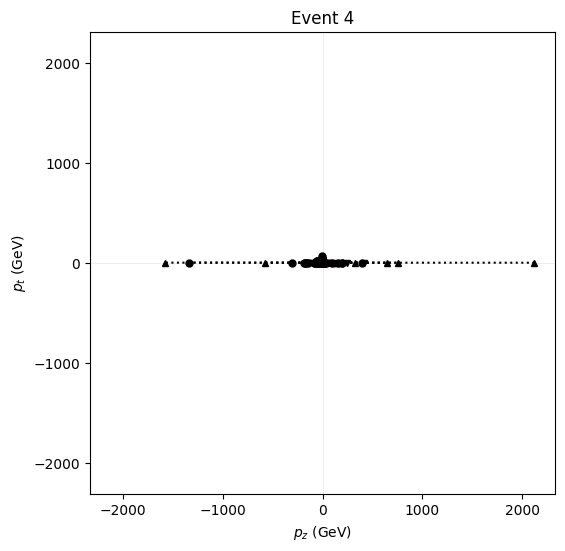

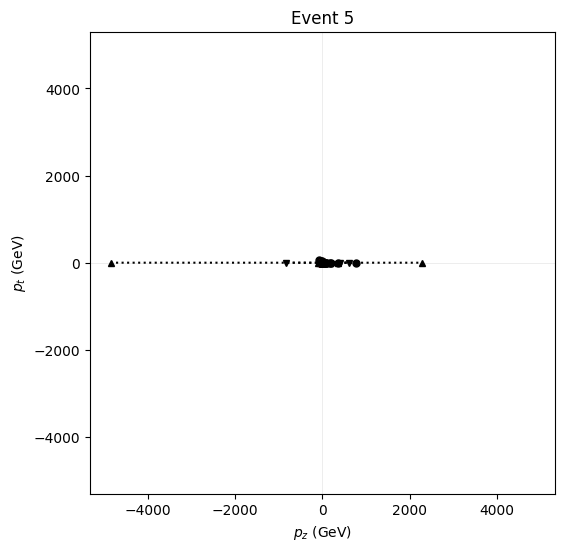

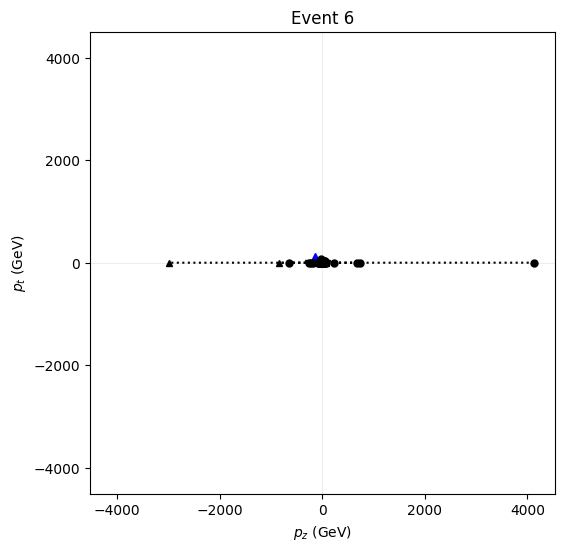

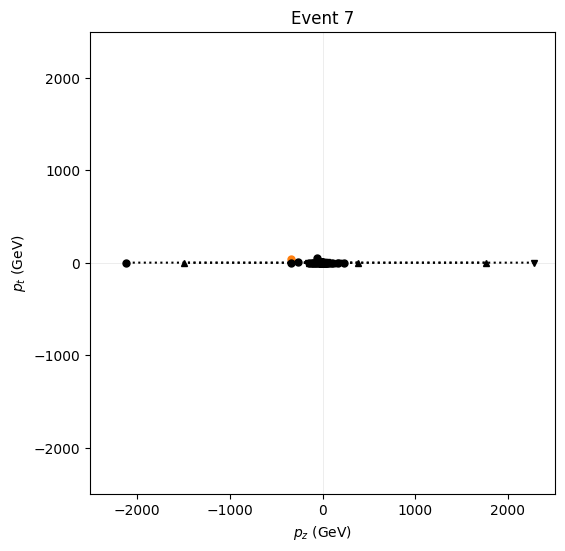

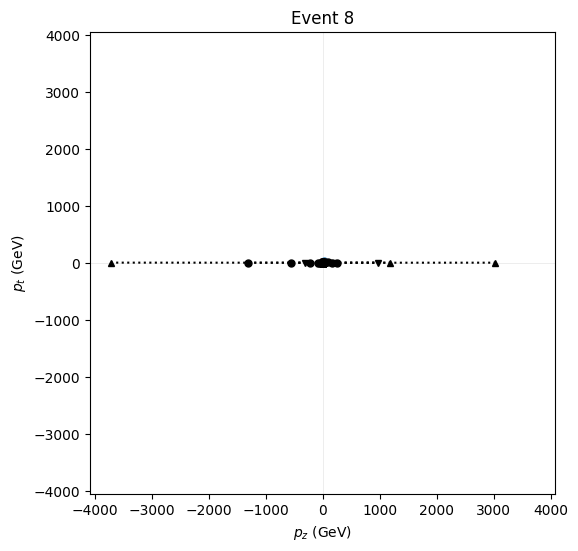

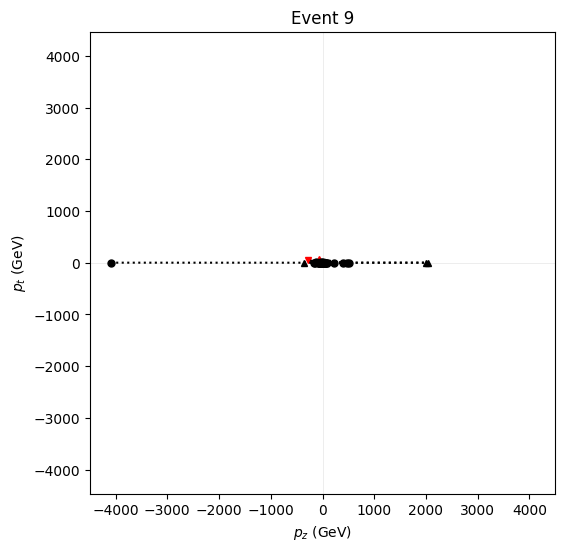

In [15]:
def get_figure_longitudinal(particles):
    pzs=1.1*max([abs(p.momentum.pz) for p in particles]) 
    pts=1.1*max([abs(p.momentum.pt()) for p in particles])
    
    pztmax=max(pzs,pts)
    fig, ax = plt.subplots(figsize=(6,6))
    ax.axis('equal')
    ax.axis([-pztmax, pztmax, -pztmax, pztmax])
    ax.axhline(y=0, xmin=-pzs, xmax=pzs, color='black',alpha=0.1, linewidth=0.5)
    ax.axvline(x=0, ymin=-pts, ymax=pts, color='black', alpha=0.1, linewidth=0.5)
    ax.set_xlabel('$p_{z}$ (GeV)')
    ax.set_ylabel('$p_{t}$ (GeV)')
    return fig,ax    

def draw_longitudinal(ax, particles, showlegend=True):
    for p in particles:
        ax.plot([0,p.momentum.pz], [0,p.momentum.pt()], **line_args(p), **line_label(p), markersize=5)
        #circle_max = patches.Circle((0, 0), radius=p.momentum.pt(), fill = False, alpha=0.5)
        #ax.add_patch(circle_max)
        if showlegend: ax.legend()# prints the key of labels from earlier into each graph

with pyhepmc.open('../data/events_decayed_hadronised.hepmc') as f:
    for i,event in enumerate(f):
        fs = GetFS(event)
        fig,ax=get_figure_longitudinal(fs)
        draw_longitudinal(ax, fs, showlegend=False)
        ax.set_title(f'Event {i}')
        plt.show()
        